In [1]:
import math 
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from matplotlib import rcParams

# display preferences
%matplotlib inline 
pd.options.display.float_format = '{:.3f}'.format

# Supress annoying harmless error.
warnings.filterwarnings(
action='ignore',
    module='scipy',
message='^internal gelsad')

In [2]:
rcParams['figure.figsize'] = 9,7
sns.set_style('darkgrid')

In [3]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [4]:
linreg = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV', 'Radio', 'Newspaper']]


In [7]:
linreg.fit(X, Y)

# Inspect the results
print('\nCoefficeints: \n', linreg.coef_)
print('\nIntercept: \n', linreg.intercept_)
print('\nR-squared: ')
print(linreg.score(X, Y))


Coefficeints: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared: 
0.8972106381789521


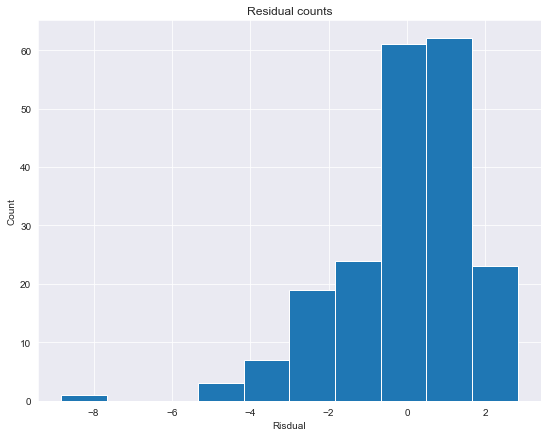

In [8]:
# Extract predicted values
predicted = linreg.predict(X).ravel()
actual = data['Sales']

# calculate the error, also called the residiual
residual = actual - predicted

# this looks a bit concering
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Risdual')
plt.ylabel('Count')
plt.show()

In [9]:
residual.min()

-8.82768710176954

In [10]:
residual = sorted(residual)

In [11]:
residual.remove(residual[0])

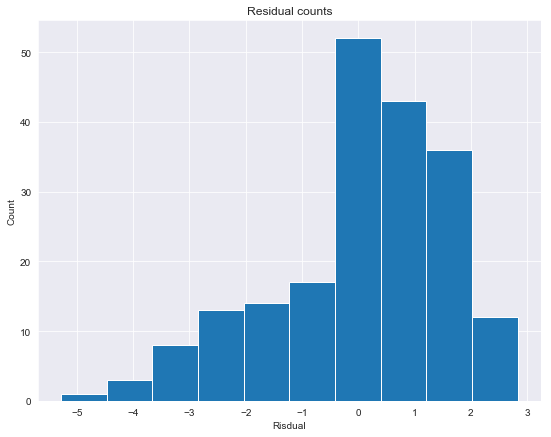

In [12]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Risdual')
plt.ylabel('Count')
plt.show()

In [13]:
df = pd.DataFrame()

In [14]:
df['actual'] = actual
df['predicted'] = predicted

In [15]:
df['residual'] = df['actual'] - df['predicted']

In [16]:
df[df['residual'] == df['residual'].min()]

,actual,predicted,residual
130,1.600,10.428,-8.828


In [17]:
df = df.drop(130)

In [18]:
data[data['Sales'] == 1.600]

,Unnamed: 0,TV,Radio,Newspaper,Sales
130,131,0.700,39.600,8.700,1.600


In [19]:
data = data.drop(130)

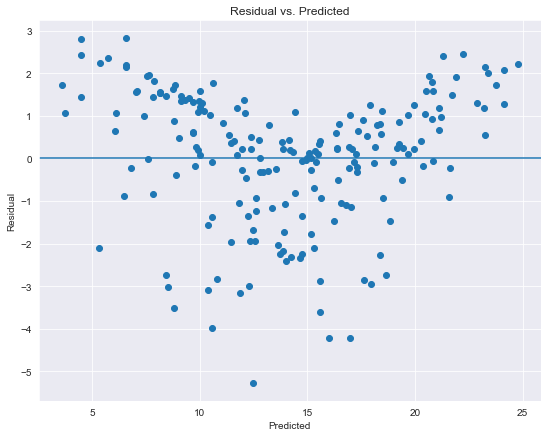

In [20]:
plt.scatter(df['predicted'], df['residual'])
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

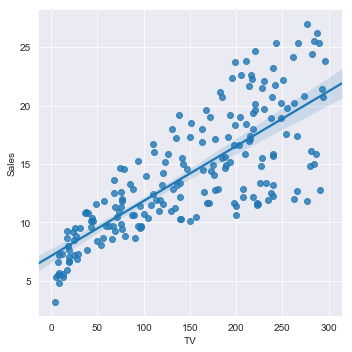

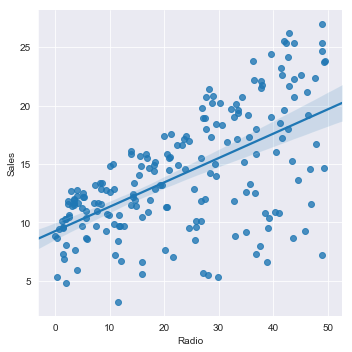

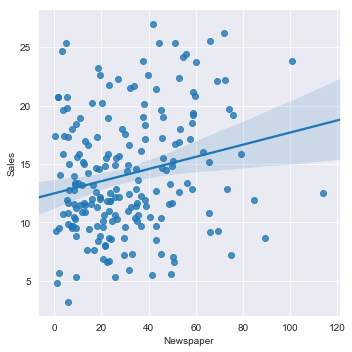

In [21]:
sns.set_style('darkgrid')
sns.lmplot('TV', 'Sales', data)
sns.lmplot('Radio', 'Sales', data)
sns.lmplot('Newspaper', 'Sales', data)

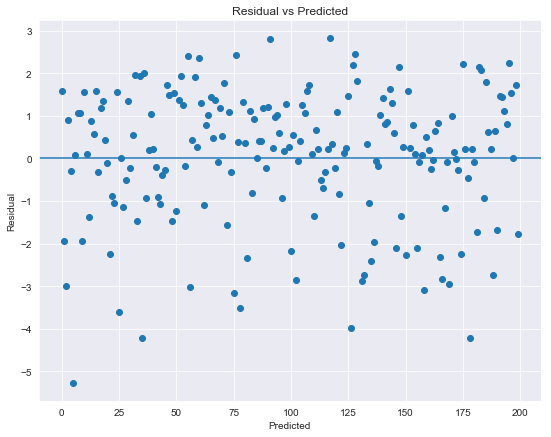

In [22]:
plt.scatter(df['residual'].index, df['residual'].values)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs Predicted')
plt.show()

In [24]:
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV', 'Radio', 'Newspaper']]

print('\nCoefficeints: \n', linreg.coef_)
print('\nIntercept: \n', linreg.intercept_)
print('\nR-squared: ')
print(linreg.score(X, Y))


Coefficeints: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared: 
0.9089904564061974


In [26]:
sqrt_TV = [math.sqrt(x) for x in data['TV']]

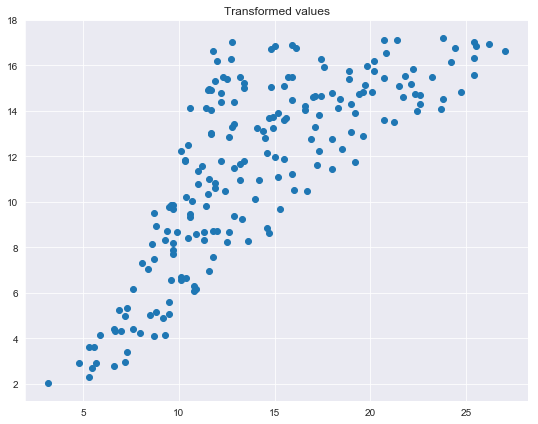

In [32]:
plt.scatter(Y, sqrt_TV)
plt.title('Transformed values')
plt.show()

In [35]:
log_TV = [math.log(x) for x in data['TV']]

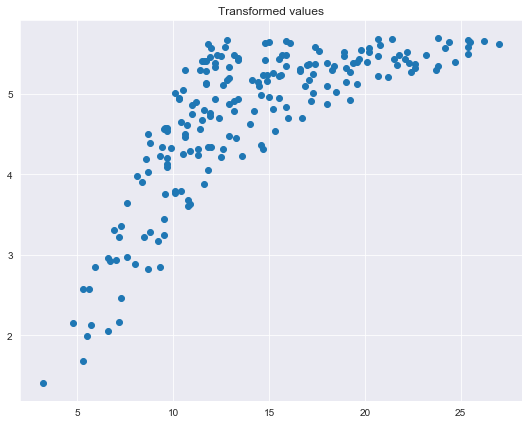

In [36]:
plt.scatter(Y, log_TV)
plt.title('Transformed values')
plt.show()